# 'Performance' Feature Exploration

Exploratory Data Analysis of features grouped under 'Performance' in Fbref. 

In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#load the att_explore dataframe in 
att_explore = pd.read_csv('att_explore.csv')
att_explore.head()

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
0,10000,140,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,...,0,0,0,1,0,0,NaN,0.0,1,83.783784
1,24977,340,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,...,0,0,0,0,0,1,NaN,NaN,1,71.428571
2,37756,498,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,...,0,0,0,1,0,0,NaN,NaN,0,58.823529
3,18759,262,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,...,0,0,0,0,1,0,NaN,0.0,2,81.818182
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,0,0,0,0,1,0,NaN,0.2,5,87.500000


### EDA Functions

In [22]:
def discrete_freq_plot(feature, df, font_size = 7, text_rotate = 0, xticks = False, diff = 1):
    #get the value counts
    counts = df[feature].value_counts().sort_index()
    
    fig, ax = plt.subplots()
    counts.plot(kind = 'bar', alpha = 0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {feature}')
    
    if xticks == True:
        range_min = df[feature].min()
        range_max = df[feature].max()
        ax.set_xticks(range(range_min, range_max + diff, diff))
        ax.set_xticklabels(range(range_min, range_max + diff, diff))
    
    plt.xticks(rotation = text_rotate, fontsize = font_size)
    plt.show()

In [129]:
def freq_plot(feature, bin_number, plot_title = None, df = None, font_size = 7, text_rotate = 0):
    if df is not None:
        plt.figure()
        plt.hist(df[feature], bins = bin_number, align = 'mid')
        plt.title(f'Histogram of {feature} Values')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.xticks(rotation = text_rotate, fontsize = font_size)
        plt.show()
    if plot_title is not None: 
        plt.figure()
        plt.hist(feature, bins = bin_number)
        plt.title(f'Histogram of {plot_title}')
        plt.xlabel(plot_title)
        plt.ylabel('Frequency')
        plt.xticks(rotation = text_rotate, fontsize = font_size)
        plt.show()

### Assists Feature Exploration

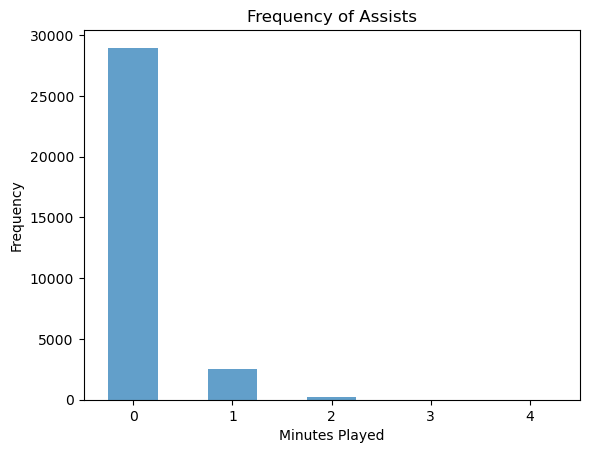

In [4]:
assists_count = att_explore['Assists'].value_counts().sort_index()

fig, ax = plt.subplots()

assists_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Assists')

plt.xticks(rotation = 0)
plt.show()

Majority of the observations have no assists. The next most frequent is 1 assist, followed by two assists. We now have a look at the relationship between 'Assists' and 'Goals'. 

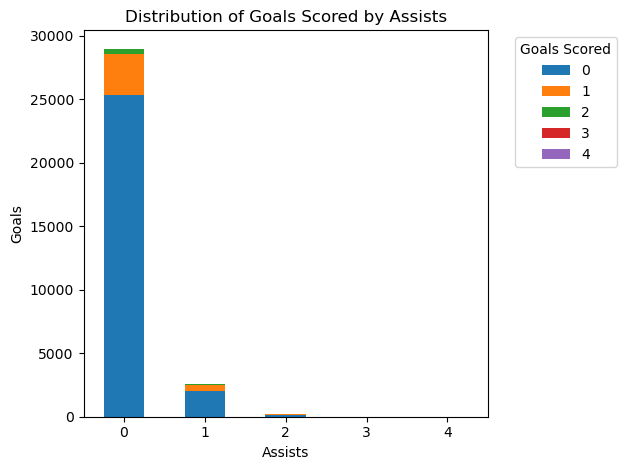

In [5]:
goals_by_assists = att_explore.groupby(['Assists', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_assists.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Assists')
ax.set_xlabel('Assists')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

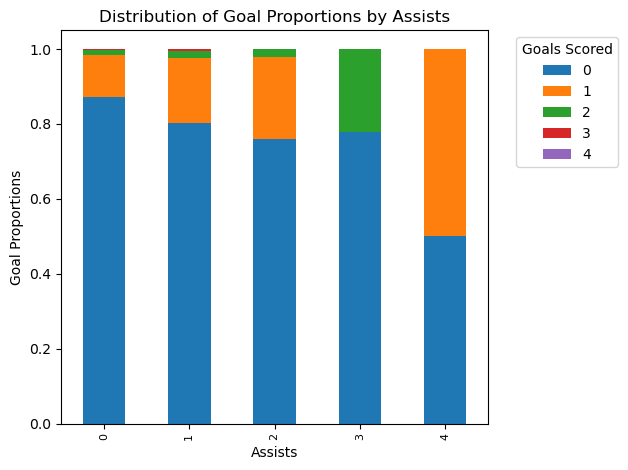

In [6]:
goalprop_by_assists = goals_by_assists.div(goals_by_assists.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_assists.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Assists')
ax.set_xlabel('Assists')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

First off, it is almost remarkable that 50% of observations with 4 assists have also scored in the same game. This is most likely due to there being very few observations with 4 assists. We can show this below. There are only two observations in the entire dataset that have 4 assists. One of those observations also recorded a goal in the same game, thus leading to what could be seen in the plot above. What is perhaps even more remarkable is that this observation was recorded as playing in a WB position!

In [7]:
att_explore[att_explore['Assists'] == 4]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
869,31293,419,Sat,1,Home,W 5–1,Manchester Utd,Leeds United,Y,LW,...,0,0,0,0,0,1,NaN,0.500000,5,75.757576
15831,23586,325,Sat,11,Home,W 6–1,Manchester City,Bournemouth,Y,WB,...,0,1,0,0,0,0,NaN,0.333333,6,90.000000


Other than this, it can be seen that a larger number of assists corresponds to a greater proportion of goals being scored. The reason for this is unclear. Perhaps this has to do with the fact that attacking players are generally more likely to contribute both goals and assists? This was actually an unexpected discovery, as I would've previously hypothesised there to be no relationship between goals scored and assists. However, one major reason to be skeptical of these plots is the fact that there are very few observations that have either 2 or 3 assists. This can be seen below. 

In [8]:
att_explore[att_explore['Assists'] == 3]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
1040,6483,101,Sun,17,Home,W 3–0,West Ham,Wolves,Y,LW,...,0,0,0,0,0,1,NaN,0.000000,3,75.471698
2777,5672,89,Sat,27,Home,W 5–1,Manchester City,Leicester City,Y,RM,...,0,0,0,0,1,0,NaN,0.500000,5,78.125000
8723,2391,35,Wed,31,Home,W 3–1,Manchester City,Brighton,Y,LW,...,0,0,0,0,0,1,NaN,1.000000,3,80.701754
11154,14862,203,Sat,25,Home,W 4–0,Liverpool,Southampton,Y,FW,...,0,0,0,0,0,0,NaN,0.666667,4,73.529412
14442,14759,203,Sat,4,Home,W 9–0,Liverpool,Bournemouth,Y,FW,...,0,0,0,0,0,0,NaN,0.800000,9,67.741935
20604,7049,109,Sun,27,Away,W 3–0,Arsenal,Fulham,Y,FW,...,0,0,0,0,0,0,NaN,0.500000,3,70.731707
24975,27903,373,Mon,36,Away,W 3–0,Liverpool,Leicester City,Y,RW,...,1,0,0,0,0,1,NaN,0.200000,3,77.500000
27484,9414,135,Sun,4,Home,W 7–2,Aston Villa,Liverpool,Y*,LW,...,0,0,0,0,0,1,NaN,0.666667,7,77.777778
30154,5174,81,Wed,32,Away,W 4–1,Newcastle Utd,Bournemouth,Y,RW,...,1,0,0,0,0,1,NaN,0.500000,4,91.666667


In [9]:
att_explore[att_explore['Assists'] == 2]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
44,10369,145,Tue,15,Away,W 4–1,Manchester City,Burnley,Y,"RW,LW",...,1,0,0,0,0,1,NaN,0.500000,4,85.294118
80,22149,306,Sun,4,Home,W 3–2,Crystal Palace,Wolves,N,FW,...,0,0,0,0,0,0,NaN,NaN,3,85.714286
178,37343,493,Sat,33,Away,W 3–2,Manchester Utd,Manchester City,Y,LW,...,0,0,0,0,0,1,NaN,NaN,3,56.521739
483,13288,186,Sat,36,Away,W 4–1,Newcastle Utd,Burnley,Y,RM,...,0,0,0,0,1,0,NaN,0.000000,4,67.647059
754,37794,500,Sun,6,Home,W 2–0,Arsenal,Everton,Y,AM,...,0,0,0,0,0,0,NaN,1.000000,2,83.870968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30255,31636,424,Sun,27,Home,W 4–1,Tottenham,Crystal Palace,Y,FW,...,0,0,0,0,0,0,NaN,0.400000,4,72.727273
30509,35553,469,Sun,37,Home,W 3–0,Tottenham,Leicester City,Y,RW,...,1,0,0,0,0,1,NaN,NaN,3,78.571429
30830,1818,29,Sun,28,Home,W 5–0,Leicester City,Sheffield Utd,Y,FW,...,0,0,0,0,0,0,NaN,0.400000,5,81.818182
30831,12637,177,Wed,33,Home,W 4–1,Manchester City,Arsenal,Y,FW,...,0,0,0,0,0,0,NaN,0.833333,4,73.913043


So there are 9 observations that have 3 assists in one game, and 195 observations that have 2 assists in one game. These are very small numbers when compared to the total number of observations, so we should take these insights with a degree of caution. 

### 'Penalties' Feature Exploration

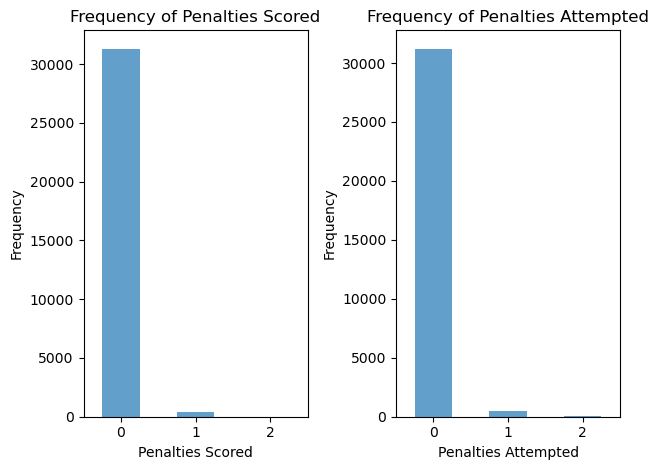

In [10]:
penscored_count = att_explore['Penalties Scored'].value_counts().sort_index()
penattempt_count = att_explore['Penalties Attempted'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

penscored_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Penalties Scored')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Penalties Scored')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

penattempt_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Penalties Attempted')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Penalties Attempted')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

So majority of the observations have no penalties scored, there are very few with 1 penalty scored, and almost no observations with 2 penalties scored. This pattern is repeated for penalties attempted, although there appears to be more observations with 2 penalty attempts. Looking at the below, we can see that out of all observations, there were only 504 that had 1 penalty attempted and 22 with 2 penalties attempted. In other words, only 1.6% of the observations had any penalties attempted. 

In [11]:
att_explore['Penalties Attempted'].value_counts()

Penalties Attempted
0    31211
1      504
2       22
Name: count, dtype: int64

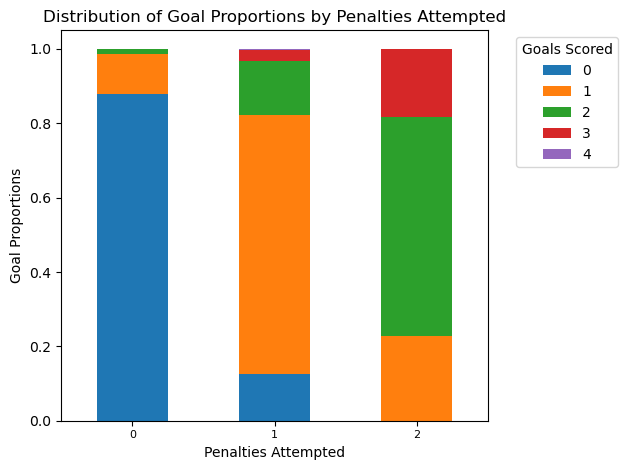

In [12]:
goals_by_penattempt = att_explore.groupby(['Penalties Attempted', 'Goals']).size().unstack(fill_value = 0)

goalprop_by_penattempt = goals_by_penattempt.div(goals_by_penattempt.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_penattempt.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Penalties Attempted')
ax.set_xlabel('Penalties Attempted')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Just over 80% of the observations that have 1 penalty attempted recorded a goal. This makes sense since a penalty represents a really big chance to score goal. It is also interesting to note that all observations with 2 penalties attempted in one game recorded at minimum 1 goal. Based on this information, we can say that knowing that a penalty was attempted by a particular player in a particular game means they are very likely to have scored a goal. Next, we have a look at the proportion of 'Penalties Attempted' that actually resulted in a 'Penalty Scored'. 

In [13]:
def penprop (row):
    if row['Penalties Attempted'] == 0:
        return np.nan
    return row['Penalties Scored']/row['Penalties Attempted']

att_explore['Penalty Success Rate'] = att_explore.apply(penprop, axis = 1)
att_explore['Penalty Success Rate']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31732   NaN
31733   NaN
31734   NaN
31735   NaN
31736   NaN
Name: Penalty Success Rate, Length: 31737, dtype: float64

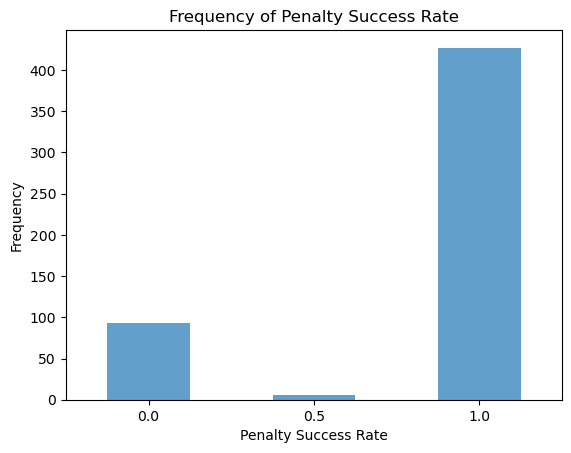

Penalty Success Rate
0.0     93
0.5      6
1.0    427
Name: count, dtype: int64

In [14]:
pensuccess_count = att_explore['Penalty Success Rate'].value_counts().sort_index()

fig, ax = plt.subplots()

pensuccess_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Penalty Success Rate')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Penalty Success Rate')

plt.xticks(rotation = 0)
plt.show()

pensuccess_count

There were a total of 526 observations that contained penalty activity (either 1 of 2 penalties attempted). 81.1% of these observations had a 100% success rate. 17.7% had a 0% success rate. Only 1.1% of them had a 50% success rate (the small number is because there needs to be 2 penalties attempted to obtain a 50% success rate. As there were very few observations with 2 penalty attempts in the first place, the number of observations with a 50% success rate from the penalty spot would be quite small.). There are a few takeaways from this. The first is that penalty success is generally quite high. In other words, if there is a penalty, we can be pretty confident that the player taking the penalty will score. The second takeaway is that penalties are quite rare events. Therefore, including penalty success rate as a feature doesn't really give us much additional information compared to the 'Penalties Attempted' feature. 

There is also a common belief that designated penalty takers are more likely to score more goals compared to non-penalty takers. This makes sense, because designated penalty takers are essentially given high value opportunities (most teams average around 5 penalties a season) to score goals. We could explore this by marking certain player IDs as designated penalty takers (if they take more than 1 penalty over the course of the season, and compare them with the rest of the observations)

In [21]:
#group observations by player ID and penalties attempted 
pen_group = att_explore.groupby('Player ID', as_index = False)['Penalties Attempted'].sum()

#remove obs with 0 penalties attempted 
pen_group = pen_group[pen_group['Penalties Attempted'] > 0 ]

#print 
pen_group

,Player ID,Penalties Attempted
7,8,3
9,10,1
13,14,1
14,15,3
15,16,1
...,...,...
507,508,4
510,511,9
511,512,14
513,514,1


So there are 134 players that took at least 1 penalty across the seasons. However, it is unlikely that all of these players can be considered 'designated penalty takers'. There may be some players that only took a penalty because the regular penalty taker wasn't on the pitch at the time for example. We wouldn't consider these 'designated penalty takers' then. 

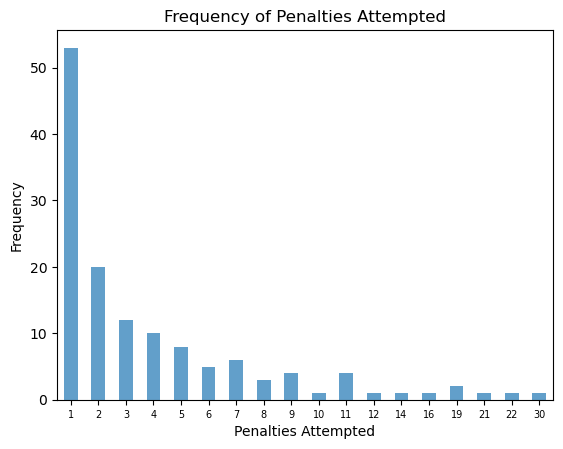

In [23]:
discrete_freq_plot('Penalties Attempted', pen_group)

The plot above shows us that just over 50 players in this list only took 1 penalty. Although it may be easier to just remove all of these players from the list outright, this may lead to us errenously removing players that are actually designated penalty takers. Instead, let's compute the percentage of the penalties taken by each of these players for their team in the seasons that they were active in the league. 

In [ ]:
#create new dataframe which has 'kickoff_time', 'Season', 'penalties attempted' and 'team in it 
team_pens = att_explore[['kickoff_time', 'Season', 'Penalties Attempted', 'Team']].copy()

#now we group by team and season to compute how many penalties were taken by each team in each season
team_pens_summary = team_pens.groupby(['Season', 'Team'], as_index=False)['Penalties Attempted'].sum()
team_pens_summary.rename(columns={'Penalties Attempted': 'Team Penalties'}, inplace=True)
print(team_pens_summary)

        Season             Team  Team Penalties
0    2017-2018          Arsenal               4
1    2017-2018      Bournemouth               1
2    2017-2018         Brighton               6
3    2017-2018          Burnley               0
4    2017-2018          Chelsea               3
..         ...              ...             ...
135  2023-2024  Nott'ham Forest               1
136  2023-2024    Sheffield Utd               4
137  2023-2024        Tottenham               2
138  2023-2024         West Ham               4
139  2023-2024           Wolves               3

[140 rows x 3 columns]


In [ ]:
#create empty dataframe
pen_prop = pd.DataFrame()

#loop through to get the Player ID and Penalties Attempted for each team in each season, filtering so that we only include observations with at 
#least 1 penalty taken 
for index, row in team_pens_summary.iterrows():
    team = row['Team']
    season = row['Season']
    
    filtered = att_explore[(att_explore['Season'] == season) & (att_explore['Team'] == team) & (att_explore['Penalties Attempted'] > 0)][['Player ID', 'Penalties Attempted']]
    filtered['Team'] = team
    filtered['Season'] = season
    pen_prop = pd.concat([pen_prop, filtered], ignore_index= True)

#adding a new column into pen_prop called 'Team Penalties' which merges the relevant information from team_pens_summary
pen_prop = pen_prop.merge(team_pens_summary, on=['Team', 'Season'], how='left')
pen_prop

,Player ID,Penalties Attempted,Team,Season,Team Penalties
0,174,1,Arsenal,2017-2018,4
1,452,1,Arsenal,2017-2018,4
2,493,1,Arsenal,2017-2018,4
3,174,1,Arsenal,2017-2018,4
4,40,1,Bournemouth,2017-2018,1
...,...,...,...,...,...
521,494,1,West Ham,2023-2024,4
522,337,1,West Ham,2023-2024,4
523,326,1,Wolves,2023-2024,3
524,39,1,Wolves,2023-2024,3


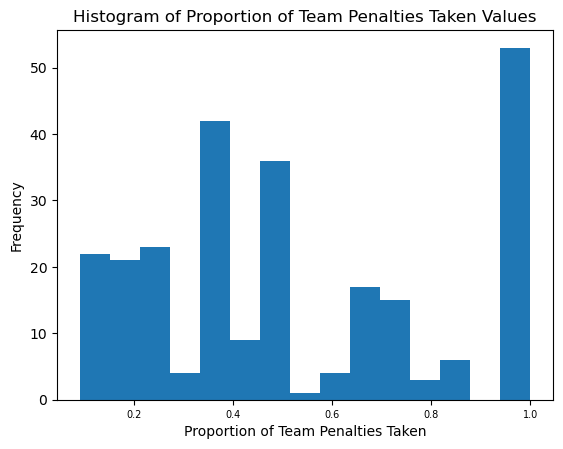

In [134]:
#we now merge rows that have the same player ID, team and season together. For the rows that satisfy this, we sum the penalties attempted to 
#reflect the number of penalties a particular player ID took in a given season 

merged_penprop = pen_prop.groupby(['Team', 'Season', 'Player ID'], as_index=False).agg({
    'Penalties Attempted': 'sum',
    'Team Penalties': 'first'  
})
merged_penprop = merged_penprop.sort_values(by='Player ID')

#adding new column called Proportion of Team Penalties Taken
merged_penprop['Proportion of Team Penalties Taken'] = (
    merged_penprop['Penalties Attempted'] / merged_penprop['Team Penalties']
)

#plot the frequency of proportion of team penalties taken 
freq_plot('Proportion of Team Penalties Taken', 15, df = merged_penprop)

In [145]:
merged_penprop

,Team,Season,Player ID,Penalties Attempted,Team Penalties,Proportion of Team Penalties Taken
229,West Ham,2017-2018,8,1,3,0.333333
236,West Ham,2021-2022,8,2,5,0.400000
219,Watford,2017-2018,10,1,5,0.200000
54,Cardiff City,2018-2019,14,1,4,0.250000
94,Everton,2022-2023,15,2,3,0.666667
...,...,...,...,...,...,...
75,Crystal Palace,2017-2018,512,5,7,0.714286
76,Crystal Palace,2018-2019,512,8,8,1.000000
77,Crystal Palace,2019-2020,512,1,1,1.000000
185,Newcastle Utd,2023-2024,514,1,7,0.142857


In [ ]:
#final dataframe which merges the rows based on Player ID. Each row now corresponds to one unique player ID, the penalties attempted and team 
#penalties columns are now summed. The proportion is then recalculated 
penprop_summary = merged_penprop.groupby('Player ID').agg(
    Penalties_Attempted=('Penalties Attempted', 'sum'),
    Team_Penalties=('Team Penalties', 'sum')
).reset_index()

penprop_summary['Proportion of Team Penalties Taken'] = (
    penprop_summary['Penalties_Attempted'] / penprop_summary['Team_Penalties'])

penprop_summary

,Player ID,Penalties_Attempted,Team_Penalties,Proportion of Team Penalties Taken
0,8,3,8,0.375000
1,10,1,5,0.200000
2,14,1,4,0.250000
3,15,3,9,0.333333
4,16,1,6,0.166667
...,...,...,...,...
129,508,4,7,0.571429
130,511,9,19,0.473684
131,512,14,16,0.875000
132,514,1,7,0.142857


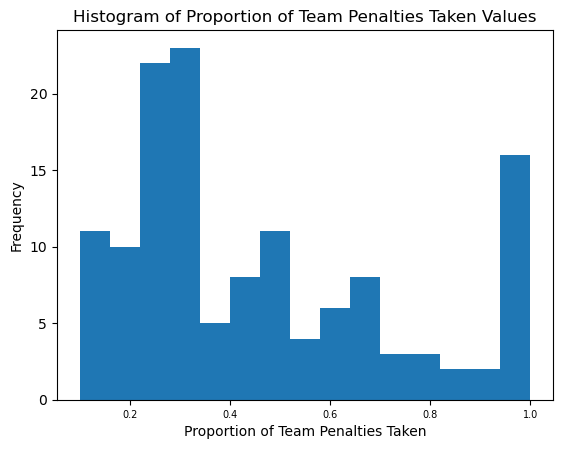

In [152]:
freq_plot('Proportion of Team Penalties Taken', 15, df = penprop_summary)

In [ ]:
#first off, we can probably include all player ID's with 100% team penalties taken as 'designated penalty takers'
desig_pen_takers = penprop_summary.loc[penprop_summary['Proportion of Team Penalties Taken'] == 1, 'Player ID'].tolist()

#we now look at the rest of the observations. let's remove the player ID's that are already included in desig_pen_takers from penprop_summary 
#for clarity 
penprop_summary = penprop_summary[~penprop_summary['Player ID'].isin(desig_pen_takers)]
penprop_summary = penprop_summary.sort_values(by='Penalties_Attempted', ascending=False)

#lets now print the remaining observations in order with the largest number of penalties attempted first 
penprop_summary

,Player ID,Penalties_Attempted,Team_Penalties,Proportion of Team Penalties Taken
95,373,30,40,0.750000
6,29,22,33,0.666667
96,379,21,33,0.636364
105,424,19,22,0.863636
56,229,19,29,0.655172
...,...,...,...,...
99,390,1,2,0.500000
100,408,1,7,0.142857
101,415,1,7,0.142857
1,10,1,5,0.200000


We can see that of the remaining observations, player ID 373 attempted 30 penalties out of 40 team penalties, followed by player ID 29, who took 22 out of 33 penalties. Due to the sheer volume of penalties attempted by these players, it would make sense to include them as designated penalty takers. In fact, it probably makes sense to include all remaining observations that took more than 50% of the team's penalties. 

In [158]:
additional_takers = penprop_summary.loc[penprop_summary['Proportion of Team Penalties Taken'] > 0.5, 'Player ID'].tolist()
desig_pen_takers.extend(additional_takers)

#we now remove the rows corresponding to the player ID's that we just added to desig_pen_takers
penprop_summary = penprop_summary[~penprop_summary['Player ID'].isin(desig_pen_takers)]
penprop_summary

,Player ID,Penalties_Attempted,Team_Penalties,Proportion of Team Penalties Taken
114,452,11,23,0.478261
64,258,11,25,0.440000
130,511,9,19,0.473684
106,431,8,17,0.470588
45,174,7,16,0.437500
...,...,...,...,...
99,390,1,2,0.500000
100,408,1,7,0.142857
101,415,1,7,0.142857
1,10,1,5,0.200000


Of the remaining observations, we can see that the player with most penalties attempts did attempt 11 penalties. However, this was only 11 penalties out of 23 total team penalties. Although it seems harsh to mark this player as a non-designated penalty taker, I believe this makes sense. 

The final thing to do is then add a new column onto att_explore called 'Designated Penalty Taker'. This column will take a value of 1 if the player ID matches that of a designated penalty taker, and 0 otherwise. 

In [159]:
att_explore['Designated Penalty Taker'] = att_explore['Player ID'].isin(desig_pen_takers).astype(int)

We can now compare the proportion of goals scored for penalty takers and non-penalty takers. 

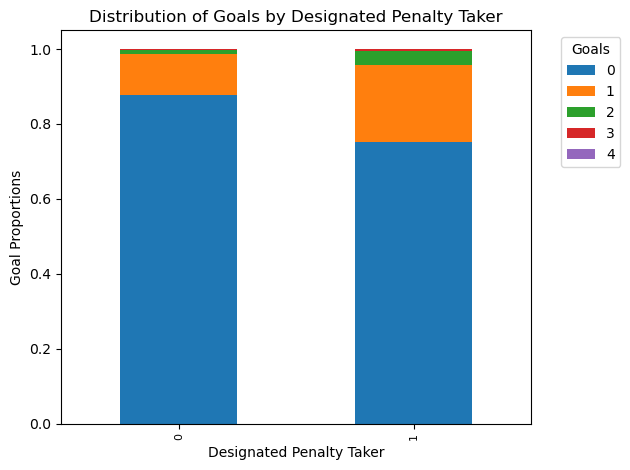

In [160]:
goals_by_desigpentaker = att_explore.groupby(['Designated Penalty Taker', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_desigpentaker = goals_by_desigpentaker.div(goals_by_desigpentaker.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_desigpentaker.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Designated Penalty Taker')
ax.set_xlabel('Designated Penalty Taker')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can clearly see that the proportion of observations with at least 1 goal is much greater for observations that we have marked as designated penalty takers. Therefore, it makes sense to include this feature. 

### Shots Feature Exploration

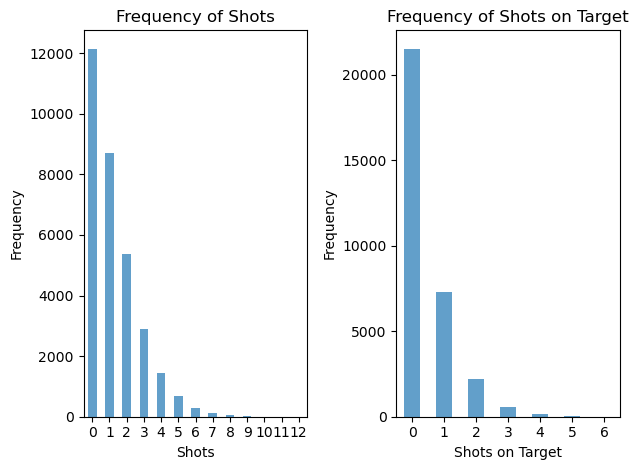

In [ ]:
shots_count = att_explore['Shots'].value_counts().sort_index()
sot_count = att_explore['Shots on Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

shots_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Shots')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

sot_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Shots on Target')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The general trend is that majority of observations have both 0 shots and shots on target. This makes sense, because the dataset contains quite a few observations that are defensive/midfield players, who will generally not be shooting much throughout the game. On this basis, we can have a look to see how this plot changes if we just include attackers. 

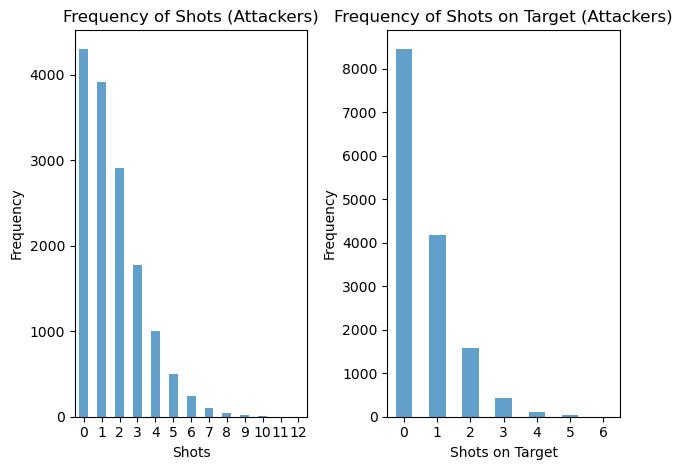

In [ ]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_shots_df = att_explore[attackers_condition][['Shots', 'Shots on Target', 'Goals']]

shots_count = attackers_shots_df['Shots'].value_counts().sort_index()
sot_count = attackers_shots_df['Shots on Target'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

shots_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Shots (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

sot_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Shots on Target (Attackers)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

It is interesting that the trend is broadly the same. We can see that the difference between the number of observations with no shots and the number of observations with 1 shots is now much closer, compared to the previous plot. This makes sense, as we expect more of the observations now to be taking shots (since we are only plotting the observations that played in the attacking positions). 

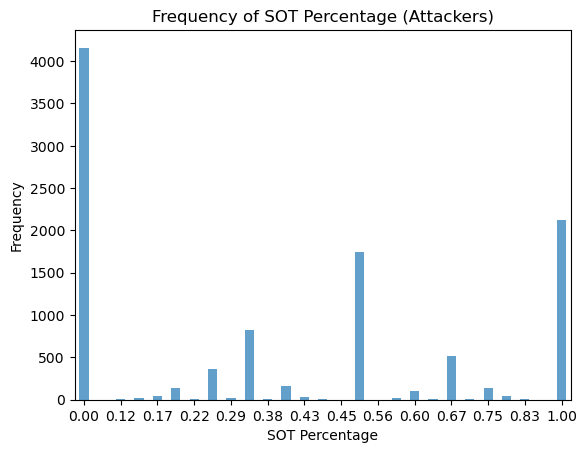

In [ ]:
#creating new feature - shot on target percentage 
attackers_shots_df['SOT Percentage'] = attackers_shots_df['Shots on Target']/attackers_shots_df['Shots']

#counting the number of each unique SOT percentage 
sotpct_count = attackers_shots_df['SOT Percentage'].value_counts().sort_index()

#plotting
fig, ax = plt.subplots()

sotpct_count.plot(kind = 'bar', alpha = 0.7, ax = ax)

ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of SOT Percentage (Attackers)')

#setting x-ticks to deal with overcrowding on the x-axis
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels([f'{s:.2f}' for s in sotpct_count.index[::2]])
plt.xticks(rotation = 0)
plt.show()

So there is no clear pattern when looking at the frequency of shots on target percentages. The large number of observations with 0% shots on target percentage mostly consist of the observations that had 0 shots in the game. There is also a suprisingly large number of observations that had 100% shot on target percentage. I speculate majority of those consist of observations that had 1 shot and 1 shot on target. We can really quickly compare the plot above, to a similar plot but this time including data from all other positions as well. 

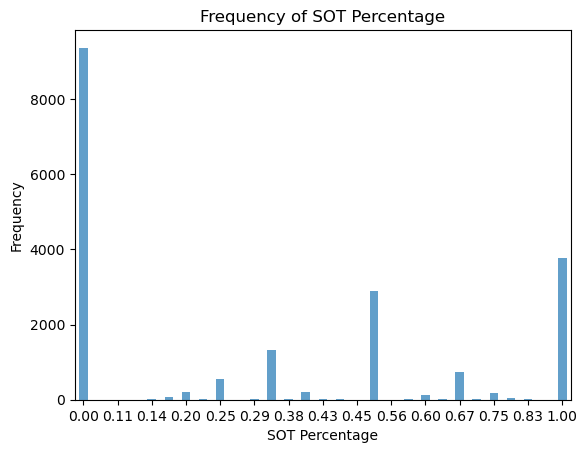

In [ ]:
#creating new feature - shot on target percentage 
att_explore['SOT Percentage'] = att_explore['Shots on Target']/att_explore['Shots']

#counting the number of each unique SOT percentage 
sotpct_count = att_explore['SOT Percentage'].value_counts().sort_index()

#plotting
fig, ax = plt.subplots()

sotpct_count.plot(kind = 'bar', alpha = 0.7, ax = ax)

ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of SOT Percentage')

#setting x-ticks to deal with overcrowding on the x-axis
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])
ax.set_xticklabels([f'{s:.2f}' for s in sotpct_count.index[::2]])
plt.xticks(rotation = 0)
plt.show()

There is actually quite a similar pattern, which is slightly surprising. I would've expected there to be more observations with a reduced shot on target percentage, by virtue of the fact that including midfielders/defenders in the plot would lead to an on average worse shooting ability, so more observations with lower shot on target percentages. However, the other way to look at it would be that a lot of those observations wouldn't have taken shots anyway, so the overarching pattern stays somewhat similar. The current plots show that there are quite a few varying values for 'SOT Percentage'. Perhaps we could look into grouping them?

One final thing I also want to take a look at is how the SOT Percentage differs across the number of shots taken in a game. We will have to plot the proportion of observations per SOT Percentage, since there are so many SOT Percentage values that have very few observations. 

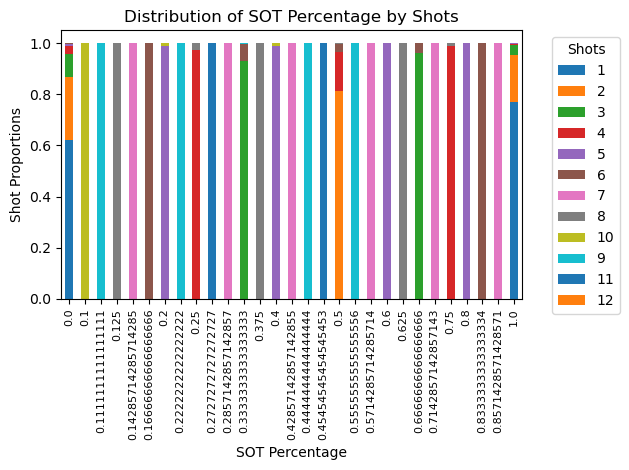

In [ ]:
sotpct_by_shots = att_explore.groupby(['SOT Percentage', 'Shots']).size().unstack(fill_value = 0)
sotpctprop_by_shots = sotpct_by_shots.div(sotpct_by_shots.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

sotpctprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of SOT Percentage by Shots')
ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Shot Proportions')
ax.legend(title = 'Shots', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


Very messy plot! We can see that there are quite a few of the bars that only have one colour. For example, the 0.1 bar (10% shot on target percentage) is only from observations with 10 shots in one game. We can probably remove them from the plot for better interpretability. 

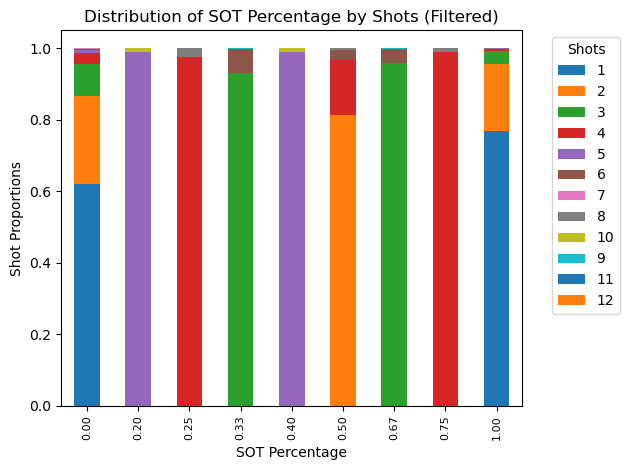

In [ ]:
#modifying sotpctprop_by_shots to only include SOT Percentages with multiple shot values 
sotpctprop_by_shots = sotpctprop_by_shots.loc[~(sotpctprop_by_shots.isin([1]).any(axis = 1))]

fig, ax = plt.subplots()

sotpctprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of SOT Percentage by Shots (Filtered)')
ax.set_xlabel('SOT Percentage')
ax.set_ylabel('Shot Proportions')
ax.legend(title = 'Shots', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

ax.set_xticks(range(len(sotpctprop_by_shots.index)))
ax.set_xticklabels([f'{value:.2f}' for value in sotpctprop_by_shots.index])
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

The plot is still quite messy, but is slightly more interpretable now. Firstly, over half of the observations with 0% SOT Percentage are attributed to observations that only had 1 shot in the game. The next most frequent is 2 shots, followed by 3 shots and so on. We can also see that a lot of the other SOT percentage are down to certain number of shots. For example, a 20% SOT Percentage is only possible with either 5 shots and 1 SOT or 10 shots and 2 SOT. Finally, we can see that just under 80% of the observations with 100% SOT Percentage are down to observations with 1 shot. A potential takeaway from this is that it is difficult to achieve 100% SOT percentage. Let's now take a look at the relationship between Shots, Shots on Target, SOT Percentage and Goals. 

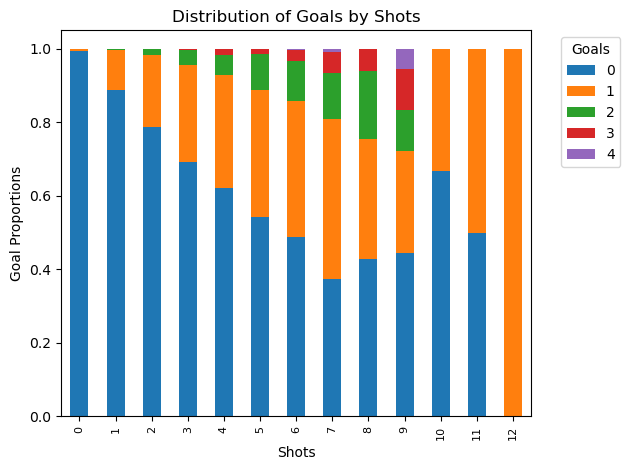

In [ ]:
goals_by_shots = att_explore.groupby(['Shots', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_shots = goals_by_shots.div(goals_by_shots.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_shots.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Shots')
ax.set_xlabel('Shots')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


First off, it appears that there is a steady trend of increasing goal proportions as shots increase all the way up to 7 shots. Then, the trend seems to reverse and become unstable. This is probably due to the fact that there are limited number of observations with 8+ shots per game. The proportion of 2 or more goals also increases similarly. The fact that there are no observations that have 2 or more goals and 10 or more shots at the same time is probably down to the limited number of observations that had 10 or more shots per game. There also seems to be some observations that had 0 shots but still managed a goal. We need to have a quick look at those observations, as there may be an issue there. 

In [ ]:
att_explore[(att_explore['Shots'] == 0) & (att_explore['Goals'] != 0)]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
391,31700,424,Sat,29,Home,D 1–1,Tottenham,Arsenal,Y,FW,...,0,0,0,0,0,0,1.0,NaN,1,42.857143
578,17043,229,Sat,1,Away,W 3–0,Chelsea,Huddersfield,Y,CM,...,0,0,0,1,0,0,1.0,NaN,3,93.939394
925,10698,148,Sat,18,Away,W 3–0,West Ham,Stoke City,Y*,CM,...,0,0,0,1,0,0,1.0,NaN,3,86.956522
2485,10624,148,Sat,3,Away,W 3–1,West Ham,Watford,Y*,"DM,CM",...,0,0,0,1,0,0,1.0,NaN,3,90.384615
2753,24559,337,Sat,22,Away,W 2–1,Southampton,Leicester City,Y,"CM,DM,WB",...,0,1,0,1,0,0,1.0,NaN,2,68.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30104,24617,338,Mon,13,Home,W 3–2,Fulham,Wolves,Y,LW,...,0,0,0,0,0,1,1.0,NaN,3,89.473684
30247,24383,337,Thu,22,Home,D 1–1,West Ham,Bournemouth,Y,AM,...,0,0,0,0,0,0,1.0,NaN,1,84.615385
31450,38706,512,Sat,18,Away,W 3–2,Crystal Palace,Manchester City,Y*,CM,...,0,0,0,1,0,0,1.0,NaN,3,73.684211
31530,33010,442,Sat,1,Away,W 5–0,Manchester City,West Ham,N,FW,...,0,0,0,0,0,0,1.0,NaN,5,100.000000


A quick scan appears to show that a lot of these observations have a Penalty Success Rate of 1. Let's further filter out these observations to remove any that have Penalty Success Rate = 1. 

In [ ]:
att_explore[(att_explore['Shots'] == 0) & (att_explore['Goals'] != 0) & (att_explore['Penalty Success Rate'] != 1)]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
3920,20991,292,Sat,27,Home,D 1–1,Bournemouth,Wolves,Y,FW,...,0,0,0,0,0,0,0.5,NaN,1,69.230769


So we now know that goals that result from penalties are not counted as either shots or shots on target. 

Let's now have a look at the relationship between Goals and Shots on Target. 

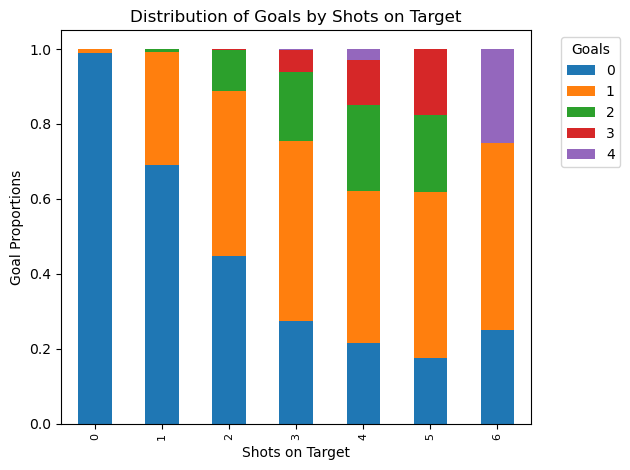

In [ ]:
goals_by_sot = att_explore.groupby(['Shots on Target', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sot = goals_by_sot.div(goals_by_sot.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sot.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Shots on Target')
ax.set_xlabel('Shots on Target')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


A similar trend emerges, where the greater the number of shots on target, the greater the proportion of observations that have at least 1 goal. For example, for observations with 5 shots on target in 1 game, over 80% of them have scored at least one goal. Based on these graphs, you could argue that Shots on Target are a stronger predictor of goals than Shots, because Shots on Target are less messy. I would also like to reproduce these two graphs but only for attackers, just to see if the trend is different when eliminating more defensive players from the plot. 

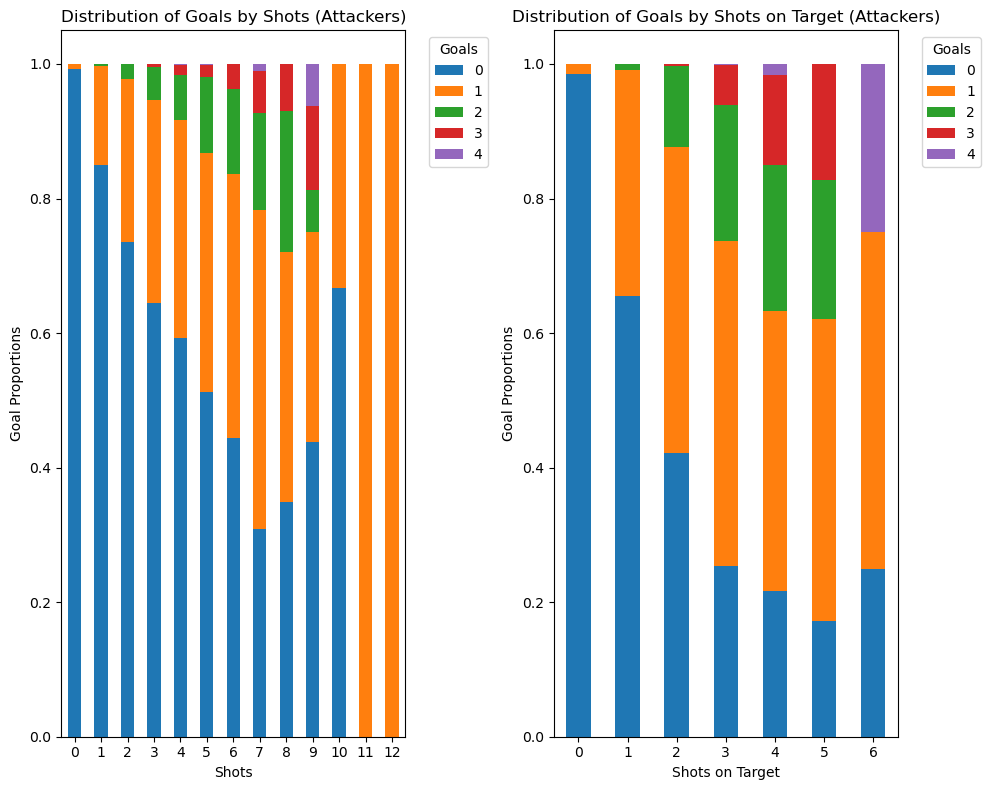

In [ ]:
attackers_goals_by_shots = attackers_shots_df.groupby(['Shots', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_shots = attackers_goals_by_shots.div(attackers_goals_by_shots.sum(axis = 1), axis = 0)

attackers_goals_by_sot = attackers_shots_df.groupby(['Shots on Target', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_sot = attackers_goals_by_sot.div(attackers_goals_by_sot.sum(axis = 1), axis = 0)

fig, axes = plt.subplots(1, 2, figsize = (10, 8))

attackers_goalprop_by_shots.plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].set_xlabel('Shots')
axes[0].set_ylabel('Goal Proportions')
axes[0].set_title('Distribution of Goals by Shots (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)
axes[0].legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

attackers_goalprop_by_sot.plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_xlabel('Shots on Target')
axes[1].set_ylabel('Goal Proportions')
axes[1].set_title('Distribution of Goals by Shots on Target (Attackers)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)
axes[1].legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')


plt.tight_layout()
plt.show()

If you compare these plots with the above, you can see that the underlying trends are largely the same. Overall, larger number of shots and shots on target will lead to a greater proportion of the observations having scored at least one goal. It seems that the pattern is more stable for shots on target, where there is quite a consistent increase in the proportion of observations having at least one goal as the number of shots on target increases. Although this pattern is also largely there for shots, it gets a little unstable as the number of shots reaches 8+, as there are very few observations that have 8+ shots per game. 

### Yellow Card/Red Card Feature Exploration

Overall, we don't expect to see much correlation between the number of yellow cards/red cards and the number of goals scored. The only possible pattern is that larger number of cards = fewer goals scored, as it is usually more likely for more defensive players to pick up yellow cards. However, we don't expect this to be a strong relationship. We start by taking a look at how many of the observations have yellow/red cards. 

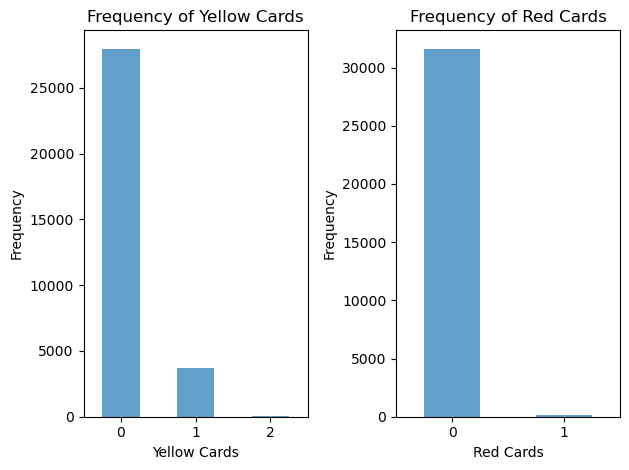

In [ ]:
yc_count = att_explore['Yellow Cards'].value_counts().sort_index()
rc_count = att_explore['Red Cards'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)

yc_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Yellow Cards')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Yellow Cards')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

rc_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Red Cards')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Red Cards')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

We can see that majority of the observations have recorded neither a yellow or a red card throughout the game. There is a fair number of observations that have recorded 1 yellow card per game, but very few that have either picked up 2 yellow cards/1 red card. We now turn our attention to the relationship between YC/RC and Goals. 

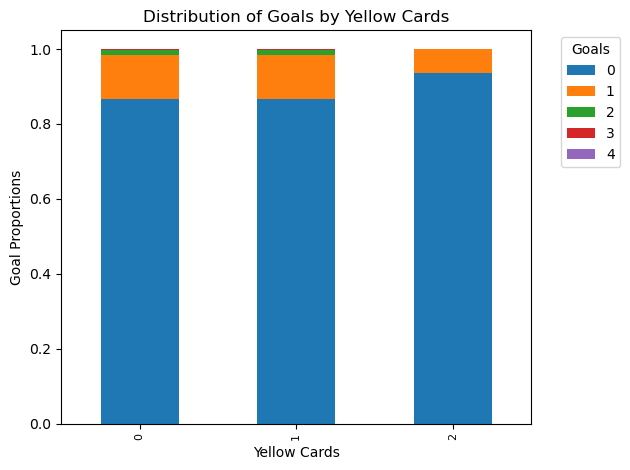

In [ ]:
goals_by_yc = att_explore.groupby(['Yellow Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_yc = goals_by_yc.div(goals_by_yc.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_yc.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Yellow Cards')
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


We can see that the proportion of observations that have at least 1 goal is pretty much the same when comparing observations with no yellow cards and observations with 1 yellow card. However, the proportion of observations with at least 1 goal is quite a bit smaller for observations with 2 yellow cards. This probably has to do with the fact that getting 2 yellow cards is equivalent to getting a red card, i.e you're sent off so you are playing less minutes in the game. We have seen previously that the more minutes you play corresponds to a greater proportion of observations scoring at least 1 goal, so this tracks. Based on this, we expect to see the proportion of observations that score at least 1 goal to be greater for observations with no red card, compared to those with a red card. 

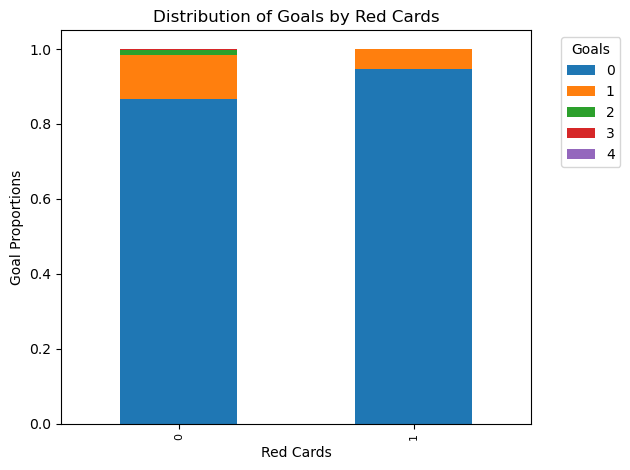

In [ ]:
goals_by_rc = att_explore.groupby(['Red Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_rc = goals_by_rc.div(goals_by_rc.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_rc.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Red Cards')
ax.set_xlabel('Red Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


As expected, the proportion of observations that have at least 1 goal is smaller for the observations that have recorded a red card, compared to thoes that did not record a red card. Although the plots do suggest some relationship between Goals and Red/ 2 Yellow cards, I believe this is primarily to do with the effect of Red/2 Yellow Cards on minutes played, which is ultimately having an impact on goals scored. In other words, the fact that an observation recorded either 2 yellow cards/1 red card is already recorded in the 'Minutes Played' feature, in terms of it's effect on goals. 

To investigate this, we can have a look at the average minutes played of those players that recorded a red card. We can then plot the proportion of goals scored for observations with a red card, and compare this to the proportion of goals scored for observations with comparable minutes played, but no red card. 

In [ ]:
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].mean()


Minutes Played    54.991304
dtype: float64

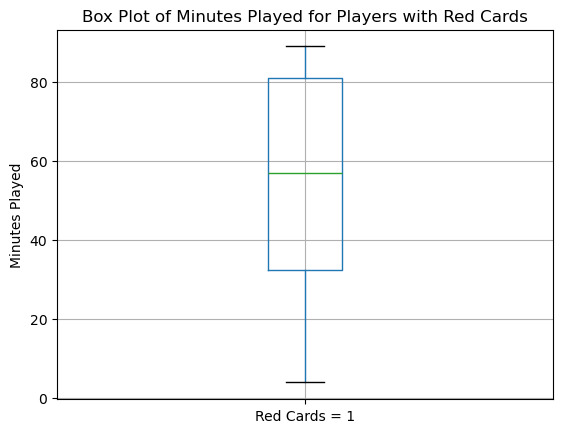

In [ ]:
plt.figure()
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Box Plot of Minutes Played for Players with Red Cards')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])
plt.show()


So of the players who recorded a red card, the mean minutes played was 54.9, with a similar median. Perhaps surprisingly, the box plot shows that the range of minutes played for players with red cards is actually quite dispersed. Let's compare this with a box plot of minutes played for all of the observations. 

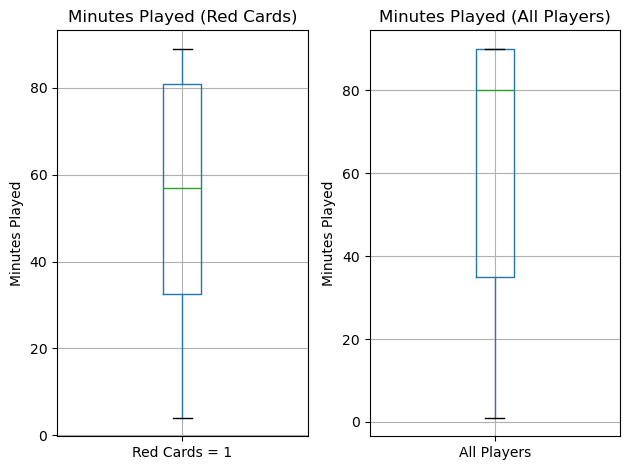

In [ ]:
plt.figure()

plt.subplot(1, 2, 1)
att_explore[att_explore['Red Cards'] == 1][['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Red Cards)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])

plt.subplot(1, 2, 2)
att_explore[['Minutes Played']].boxplot(column = 'Minutes Played')
plt.title('Minutes Played (All Players)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['All Players'])

plt.tight_layout()
plt.show()

So clearly, the minutes played when looking at all players has a much higher median than the minutes played for the players with red cards. However, the spread seems to be quite similar in terms of both the min/max as well as the interquartile range. 

In [ ]:
np.random.seed(753)
#subset of red card observations
rc_dat = att_explore[att_explore['Red Cards'] == 1]

#subset of remaining observations 
norc_dat = att_explore[att_explore['Red Cards'] == 0]

#estimating the distribution of 'Minutes Played' in rc_dat
rc_dat_mins = rc_dat['Minutes Played']
bins = np.histogram_bin_edges(rc_dat_mins, bins = 'auto')

#sample from norc_dat based  on estimated distribution
samp_dat = pd.DataFrame()

for i in range(len(bins) - 1):
    #calculate range for current bin
    bin_range = (bins[i], bins[i + 1])
    
    #filter observations that fall intocurrent bin
    bin_data = norc_dat[
        (norc_dat['Minutes Played'] >= bin_range[0]) &
        (norc_dat['Minutes Played'] < bin_range[1])
    ]
    if not bin_data.empty:
        bin_sample_size = ((rc_dat_mins >= bin_range[0]) & 
                           (rc_dat_mins < bin_range[1])).sum()
        
        sampled_from_bin = bin_data.sample(n=min(bin_sample_size, len(bin_data)), replace=True)
        samp_dat = pd.concat([samp_dat, sampled_from_bin])

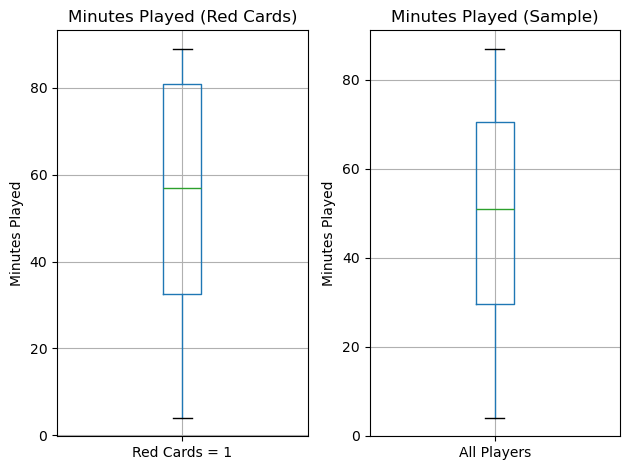

In [ ]:
plt.figure()

plt.subplot(1, 2, 1)
rc_dat.boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Red Cards)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['Red Cards = 1'])

plt.subplot(1, 2, 2)
samp_dat.boxplot(column = 'Minutes Played')
plt.title('Minutes Played (Sample)')
plt.ylabel('Minutes Played')
plt.xticks([1], ['All Players'])

plt.tight_layout()
plt.show()

We can see that the distribution of 'Minutes Played' between the Red Card subset and the sample is relatively similar. Let's now plot compare the goal proportions between these two samples

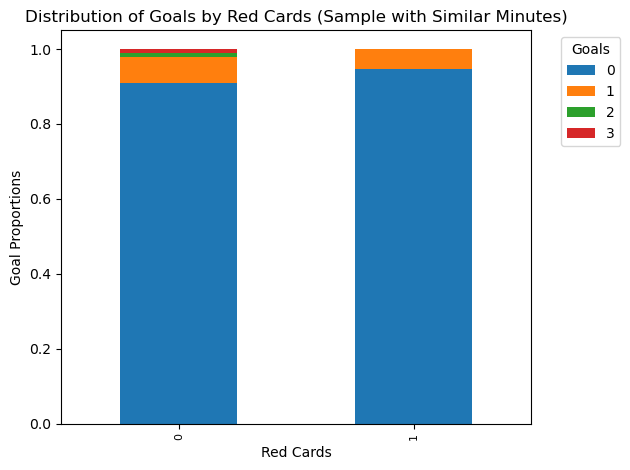

In [ ]:
rcsample_dat = pd.concat([rc_dat, samp_dat], ignore_index = True)

goals_by_rcsamp = rcsample_dat.groupby(['Red Cards', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_rcsamp = goals_by_rcsamp.div(goals_by_rcsamp.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_rcsamp.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals by Red Cards (Sample with Similar Minutes)')
ax.set_xlabel('Red Cards')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()


We can see that although there is still a difference in the proportion of goals scored by observations with red cards, compared to observations without red cards (sampled so that the distribution of minutes played is comparable to the subset of observations that have red cards), this difference is not as large as previously seen. 

### Touches Feature Exploration

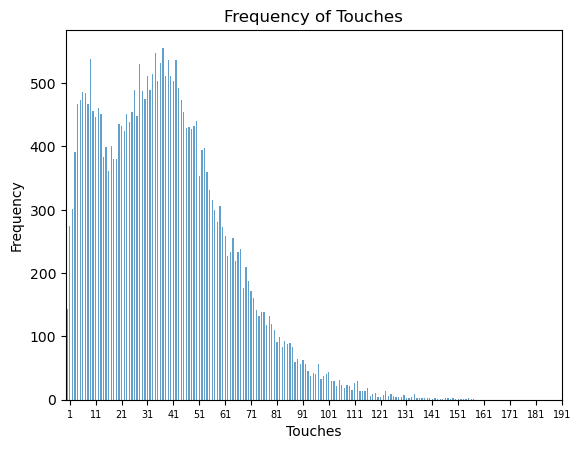

In [ ]:
touches_count = att_explore['Touches'].value_counts().sort_index()

fig, ax = plt.subplots()

touches_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Touches')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Touches')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 200, 10))
ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0, fontsize = 7)
plt.show()

Majority of the observations have 'Touches' value less than 100. We know that playing in certain positions is more likely to get you more touches (for example, you are more likely to have more touches playing in midfield and defence compared to attack). Also, you will obviously get more touches if you are playing more minutes. Let's investigate the second by inspecting a plot of 'Touches' against 'Minutes Played'. 

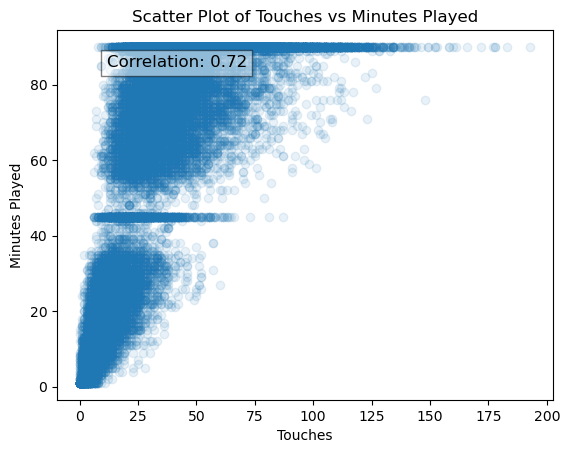

In [ ]:
correlation = att_explore['Touches'].corr(att_explore['Minutes Played'])
    
plt.figure()
plt.scatter(att_explore['Touches'], att_explore['Minutes Played'], alpha = 0.1)
plt.title(f'Scatter Plot of Touches vs Minutes Played')
plt.xlabel('Touches')
plt.ylabel('Minutes Played')
    
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', 
    transform=plt.gca().transAxes, fontsize=12, 
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.show()

We can clearly see the pattern of more minutes played = more touches. Suppose we then colour code each point in the scatter plot by the position played by the observation. 

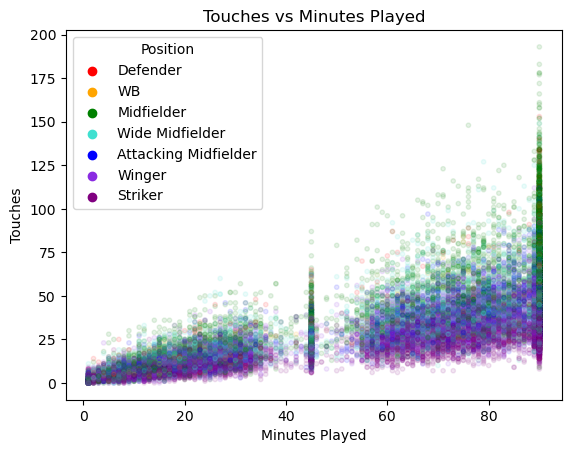

In [ ]:
def get_position(row):
    if row['Defenders'] == 1:
        return 'Defender'
    if row['WB'] == 1:
        return 'WB'
    if row['Midfielders'] == 1:
        return 'Midfielder'
    if row['Wide Midfielders'] == 1:
        return 'Wide Midfielder'
    if row['Wingers'] == 1:
            return 'Winger'
    if row['AM'] == 1:
        return 'Attacking Midfielder'

    if row['FW'] == 1:
        return 'Striker'

#position plot contains the position played by each observation
position_plot = att_explore.apply(get_position, axis = 1)

position_colourmap = {
    'Defender': 'red',
    'WB': 'orange',
    'Midfielder': 'green', 
    'Wide Midfielder': 'turquoise',
    'Attacking Midfielder': 'blue',
    'Winger': 'blueviolet', 
    'Striker': 'purple'
}

position_colours = position_plot.map(position_colourmap)

plt.figure()

plt.scatter(att_explore['Minutes Played'], att_explore['Touches'], color = position_colours, alpha = 0.1, s = 10)
plt.title('Touches vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Touches')

#custom legend
for position, colour in position_colourmap.items():
    plt.scatter([], [], color = colour, label = position)
plt.legend(title = 'Position')



plt.show()

What we can see is that darker coloured points are located towards the bottom of the plot, whilst the more green coloured points are located towards the top. This confirms our initial guess that observations classified as playing in midfield are more likely to record more touches, whilst attackers such as wingers or strikers are more likely to record less touches. We need to keep this in mind as we investigate the relationship between 'Touches' and goals. 

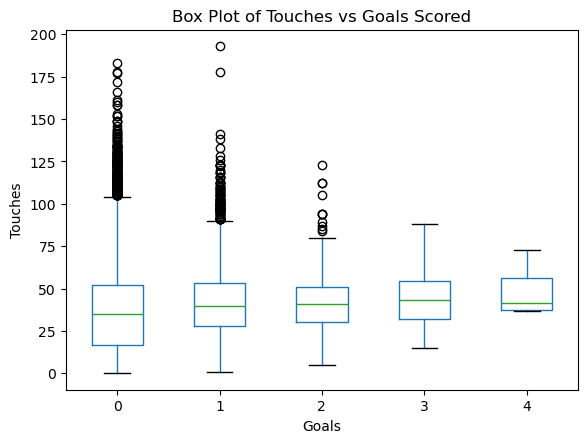

In [ ]:
plt.figure
att_explore.boxplot(column = 'Touches', by = 'Goals', grid = False)
plt.title('Box Plot of Touches vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Touches')
plt.show()

Based on the boxplot, it appears that the median number of touches for different 'Goals' values is relatively similar, at around 35. There do appear to be quite a few outliers however. Recall that we previously showed the effect of 'Position' on 'Touches'. Let's reproduce the box plot above, but using only the attackers data. 

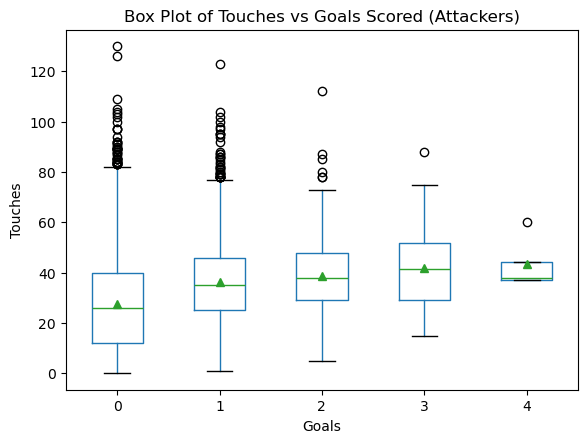

In [ ]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_touches_df = att_explore[attackers_condition][['Touches', 'Goals']]

plt.figure
attackers_touches_df.boxplot(column = 'Touches', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Touches vs Goals Scored (Attackers)')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Touches')
plt.show()

Now, it appears as if having more touches leads to more goals being scored. However, this relationship does not appear to be very strong, as we can see that the median number of touches for observations that scored at least 1 goal is the approximately the same, whether or not 1 goal is scored or 3 goals are scored. This sort of aligns with the contextual information. The number of touches that a player records in a game is largely dependent on the tactical system of the team that the player plays for, as well as the role of the player within this tactical system. For example, take two attackers; Harry Kane and Erling Haaland, both of which are prolific strikers. Harry Kane is considered to be more of a link player, meaning he will drop deep to link the midfield with the attack. This generally leads to him having more touches of the ball in comparison to Erling Haaland, who is more of a poacher. 

### Tackles, Interceptions and Blocks Feature Exploration

I have included these 3 features in the same section because these are 3 features typically considered to be associated with defensive players. We don't expect there to be any strong relationship between these features and goals scored. 

#### Tackles

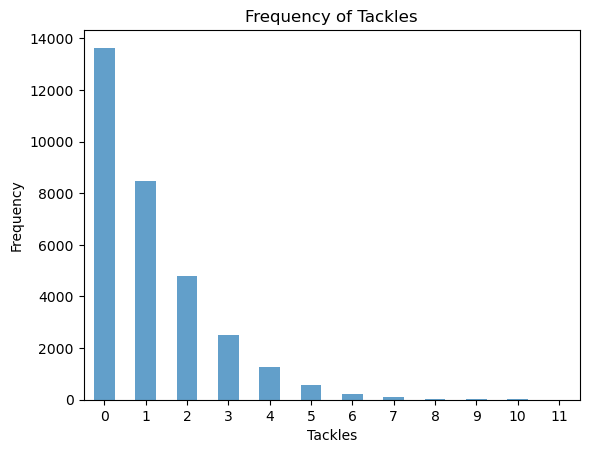

In [ ]:
tackles_count = att_explore['Tackles'].value_counts().sort_index()

fig, ax = plt.subplots()

tackles_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Tackles')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tackles')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

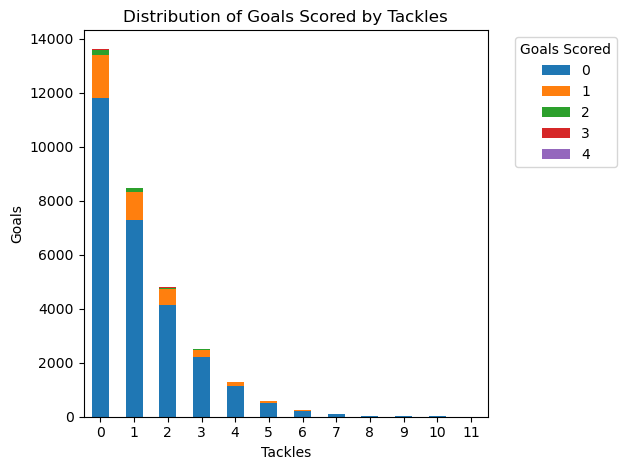

In [ ]:
goals_by_tackles = att_explore.groupby(['Tackles', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_tackles.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Tackles')
ax.set_xlabel('Tackles')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

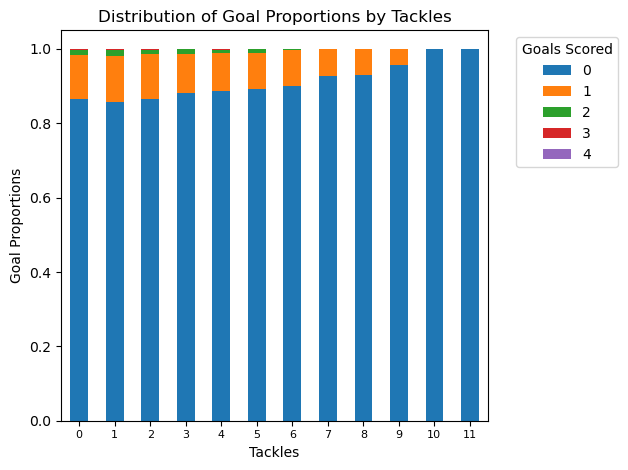

In [ ]:
goalprop_by_tackles = goals_by_tackles.div(goals_by_tackles.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_tackles.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Tackles')
ax.set_xlabel('Tackles')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There seems to be a trend where the more tackles made, the lower the proportion of observations that scored at least 1 goal. As we mentioned at the beginning, we suspect this is to do with the fact that more defensive players (i.e. Defenders or Midfielders) are more likely to make more tackles, whilst simultaneously also being less likely to score goals. We can investigate this by plotting the frequency of tackles for defensive players (Defenders, Midfielders) and comparing this with the frequency of tackles for attacking players (AM, Wingers, FW)

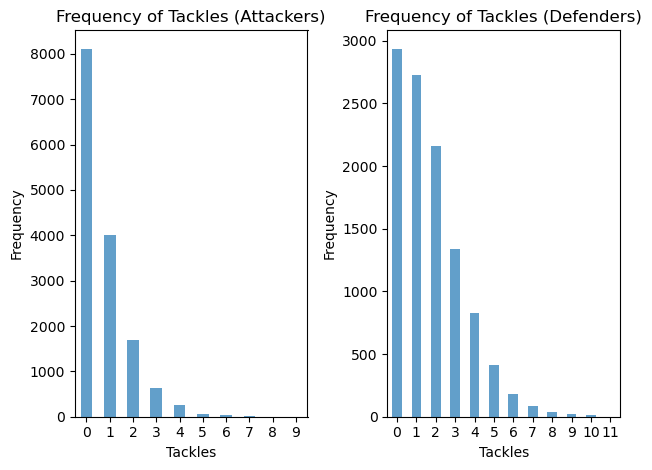

In [ ]:
attackers_condition = (att_explore['FW'] == 1) | (att_explore['Wingers'] == 1)
attackers_defdat = att_explore[attackers_condition][['Tackles', 'Interceptions', 'Blocks', 'Goals']]
attackers_tackles_count = attackers_defdat['Tackles'].value_counts().sort_index()


defenders_condition = (att_explore['Defenders'] == 1) | (att_explore['Midfielders'] == 1) | (att_explore['WB'] == 1)
defenders_defdat = att_explore[defenders_condition][['Tackles', 'Interceptions', 'Blocks', 'Goals']]
defenders_tackles_count = defenders_defdat['Tackles'].value_counts().sort_index()



fig, axes = plt.subplots(1, 2)

attackers_tackles_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Tackles')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Tackles (Attackers)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_tackles_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Tackles')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Tackles (Defenders)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

When comparing the two plots, we can clearly see that the Attackers plot has observations that have generally recorded far fewer tackles compared to the observations in the Defenders plot. This confirms our initial suspicions about the relationship between 'Tackles' and the positions played by a given observation. 

#### Interceptions

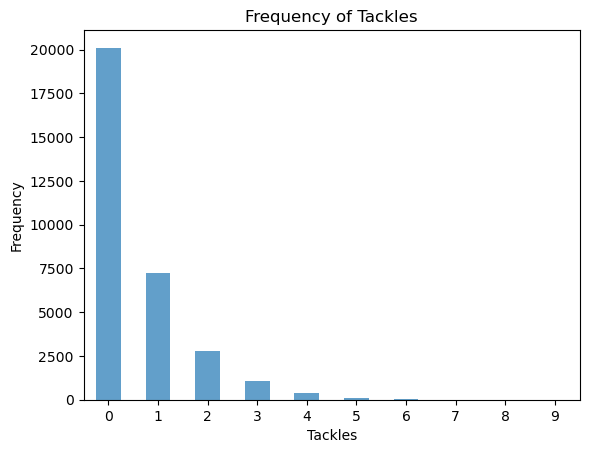

In [ ]:
interceptions_count = att_explore['Interceptions'].value_counts().sort_index()

fig, ax = plt.subplots()

interceptions_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Tackles')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tackles')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

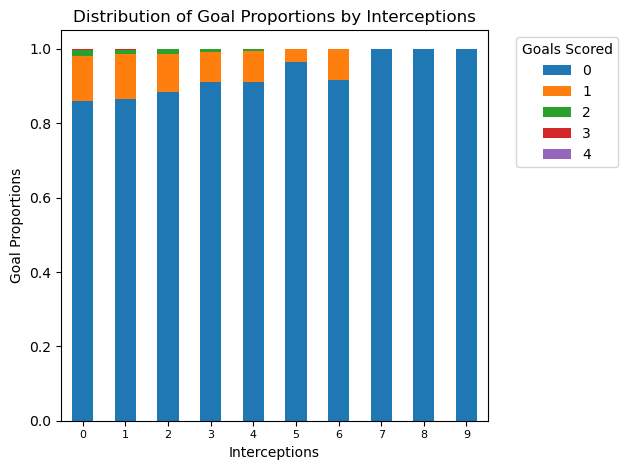

In [ ]:
goals_by_interceptions = att_explore.groupby(['Interceptions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_interceptions = goals_by_interceptions.div(goals_by_interceptions.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_interceptions.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Interceptions')
ax.set_xlabel('Interceptions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

A similar pattern emerges where we see that the more interceptions is somewhat correlated with a fewer proportion of the observations scoring at least 1 goal. There does seem to be a weird kink in the pattern, where the proportion of goals scored by observations with 6 tackles is actually comparable to the proportion of goals scored by observations with 3 interceptions. We can have a closer look. 

In [ ]:
att_explore[att_explore['Interceptions'] == 6]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
411,19725,278,Sat,32,Away,W 2–1,Brighton,Arsenal,Y,CM,...,0,0,0,1,0,0,NaN,0.333333,2,80.769231
1460,37734,498,Sat,10,Away,L 0–3,Huddersfield,Liverpool,Y,CM,...,0,0,0,1,0,0,NaN,NaN,0,78.947368
2795,29533,395,Sat,27,Away,D 0–0,Watford,Manchester Utd,Y,CM,...,0,0,0,1,0,0,NaN,1.000000,0,80.769231
2948,14357,197,Sat,17,Away,W 1–0,Bournemouth,Chelsea,Y,CM,...,0,0,0,1,0,0,NaN,NaN,1,57.692308
4117,17029,229,Sun,20,Away,W 2–1,Chelsea,Arsenal,N,CM,...,0,0,0,1,0,0,NaN,1.000000,2,88.888889
5420,2058,30,Sat,24,Away,D 0–0,Aston Villa,Brighton,Y,DM,...,0,0,0,1,0,0,NaN,NaN,0,71.153846
5572,31898,427,Wed,17,Away,L 0–2,Brighton,Tottenham,Y,"LM,CM",...,0,0,0,1,1,0,NaN,0.000000,0,50.000000
5858,4699,76,Sat,4,Home,L 0–3,Everton,Tottenham,Y,"CM,DM",...,0,0,0,1,0,0,NaN,NaN,0,84.782609
6489,38752,512,Sun,28,Home,L 0–1,Crystal Palace,Tottenham,Y*,CM,...,0,0,0,1,0,0,NaN,NaN,0,69.444444
6626,8660,128,Sun,8,Away,W 4–1,Chelsea,Southampton,Y,RM,...,0,0,0,0,1,0,NaN,1.000000,4,60.526316


As there are only 48 observations that have recorded exactly 6 interceptions, we can probably conclude that this anomaly is due to a small sample size, and shouldn't be attributed to the underlying data generating process. 

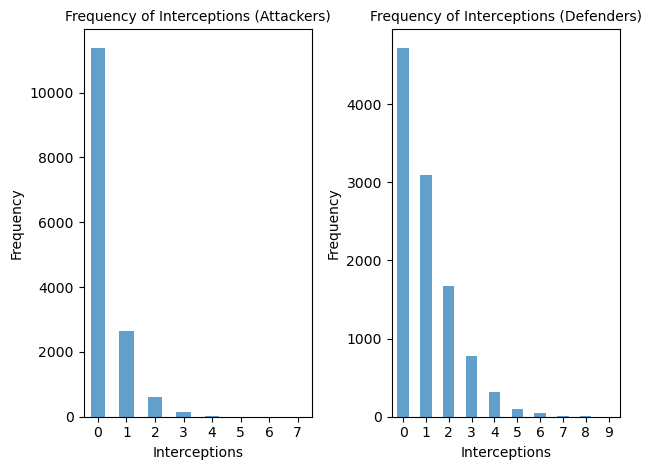

In [ ]:
attackers_interceptions_count = attackers_defdat['Interceptions'].value_counts().sort_index()
defenders_interceptions_count = defenders_defdat['Interceptions'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)
attackers_interceptions_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Interceptions')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Interceptions (Attackers)', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_interceptions_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Interceptions')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Interceptions (Defenders)', fontsize = 10)
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

We see a similar pattern where the frequency of interceptions is much greater for observations who have played in defensive positions. 

#### Blocks 

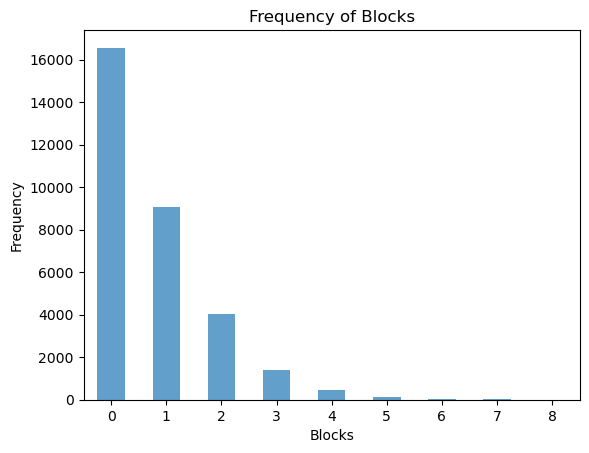

In [ ]:
blocks_count = att_explore['Blocks'].value_counts().sort_index()

fig, ax = plt.subplots()

blocks_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Blocks')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Blocks')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
# ax.set_xticks(range(1, 200, 10))
# ax.set_xticklabels(range(1, 200, 10))

plt.xticks(rotation = 0)
plt.show()

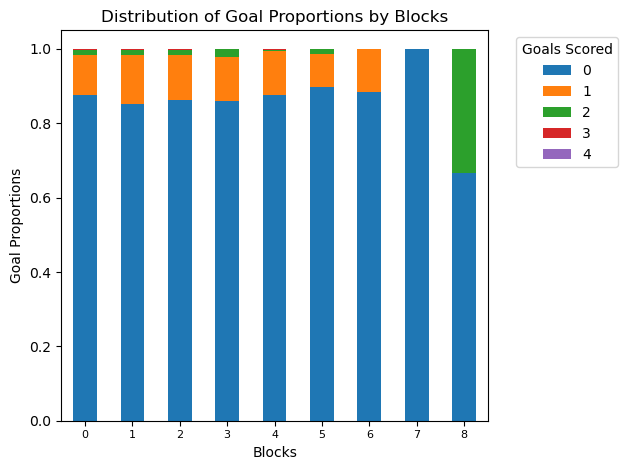

In [ ]:
goals_by_blocks = att_explore.groupby(['Blocks', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_blocks = goals_by_blocks.div(goals_by_blocks.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_blocks.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Blocks')
ax.set_xlabel('Blocks')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Somewhat surprisingly, it doesn't appear to be any relationship between the number of blocks, and the proportion of observations that have scored at least one goal. The reason for this is unclear, perhaps there isn't such a distinct relationship between the number of blocks and position? 

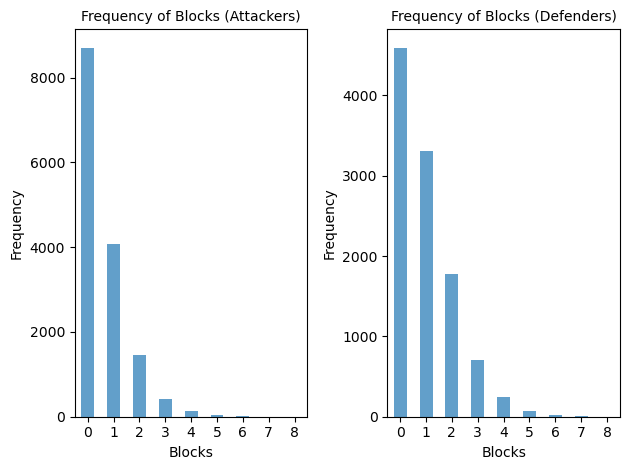

In [ ]:
attackers_blocks_count = attackers_defdat['Blocks'].value_counts().sort_index()
defenders_blocks_count = defenders_defdat['Blocks'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2)
attackers_blocks_count.plot(kind = 'bar', alpha = 0.7, ax = axes[0])
axes[0].set_xlabel('Blocks')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Blocks (Attackers)', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 0)

defenders_blocks_count.plot(kind = 'bar', alpha = 0.7, ax = axes[1])
axes[1].set_xlabel('Blocks')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Blocks (Defenders)', fontsize = 10)
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

The plots above don't seem to indicate that the distribution of 'Blocks' is similar when comparing defensive and attacking players. However, we can definitely say that the proportion of observations that have scored at least 1 goal is similar across different 'Blocks' values. Ultimately, this means that the number of Blocks made by a particular observation doesn't appear to have any significant relationship with the number of goals that are scored. 